In [108]:
import numpy as np
from   numpy import exp,cos,sin,pi,tan,sqrt,angle,absolute,eye,dot
import matplotlib.pyplot as plt
from DeDist import dedist
from __future__ import division
import dill
import seaborn.apionly as sns

In [107]:
# Get objects from notebook
dill.load_session('session_state.pkl')

### Plot 1 - Bias vs Correlation length

In [4]:
biases_theta_ML_n25 = [0.1044, 0.1014, 0.1055, 0.1022, 0.1097, 0.1302, 0.1526, 0.1525, 0.1368, 0.1115, 0.0900, 0.0710, 0.0565, 0.0459, 0.0363, 0.0288, 0.0221, 0.0174, 0.0132, 0.0097, 0.0066, 0.0034, 0.0010, 0.0000, 0.0000]

variances_theta_ML_n25 = [0.01466, 0.01438, 0.01469, 0.01460, 0.01624, 0.02282, 0.03111, 0.03298, 0.02521, 0.01695, 0.01097, 0.00696, 0.00449, 0.00291, 0.00192, 0.00124, 0.00078, 0.00052, 0.00034, 0.00022, 0.00016, 0.00009, 0.00003, 0.00000, 0.00000]

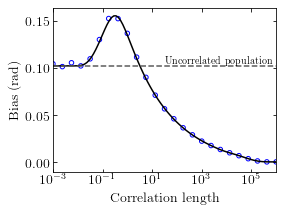

In [116]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

corr_length_arr = np.logspace(start=-3, stop=6, num=100)
corr_length_arr = np.round(corr_length_arr, 4)
plt.plot(corr_length_arr, biases_theta_GP_non_circ, color='k', ls='solid') #GP

corr_length_arr = np.logspace(start=-3, stop=6, num=25)
corr_length_arr = np.round(corr_length_arr, 4)
plt.scatter(corr_length_arr, biases_theta_ML_n25, facecolors='none', edgecolors='b', s=20) #ML

# Independent pop
lbl = get_corr_param_dict_lbl(max_corr=0.0, corr_length=1.0)
biases = GP_ests_1[lbl][1]
plt.axhline(y=biases[0], color='0.35', ls='dashed')

plt.text(10**(1.5), 0.105, 'Uncorrelated population', fontsize=10)

plt.xscale('log')
# plt.legend()

plt.tick_params(direction='in', top='on', right='on')

plt.xlabel('Correlation length')
plt.ylabel('Bias (rad)')
plt.xlim(xmin=corr_length_arr[0], xmax=corr_length_arr[-1])
# plt.title('Biases at $\Theta = 0$ for $c_0=1.0$')

plt.show()
# plt.savefig('plots/bias_corr_1.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Plot 2 - Bias vs correlation length for different max correlation values

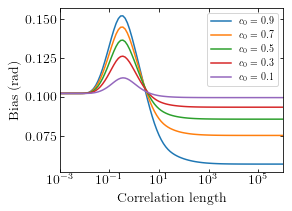

In [118]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

corr_length_arr = np.logspace(start=-3, stop=6, num=100)
corr_length_arr = np.round(corr_length_arr, 4)

# plt.plot(corr_length_arr, biases_theta_GP[5,:], '-', label='$c_0 = 1.0$')
plt.plot(corr_length_arr, biases_theta_GP[4,:], '-', label='$c_0 = 0.9$')
plt.plot(corr_length_arr, biases_theta_GP[3,:], '-', label='$c_0 = 0.7$')
plt.plot(corr_length_arr, biases_theta_GP[2,:], '-', label='$c_0 = 0.5$')
plt.plot(corr_length_arr, biases_theta_GP[1,:], '-', label='$c_0 = 0.3$')
plt.plot(corr_length_arr, biases_theta_GP[0,:], '-', label='$c_0 = 0.1$')

plt.legend()
plt.xscale('log')
plt.xlabel('Correlation length')
plt.ylabel('Bias (rad)')

plt.tick_params(direction='in', top='on', right='on')
plt.xlim(xmin=corr_length_arr[0], xmax=corr_length_arr[-1])

plt.show()
# plt.savefig('plots/bias_corr_2.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Plot 3a - Bias vs encoded angle

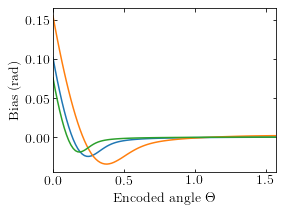

In [174]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

lbl = get_corr_param_dict_lbl(max_corr=0.0, corr_length=1.0) # Uncorrelated case
biases = GP_ests_1[lbl][1]
plt.plot(THETAS, biases, label='Uncorrelated')

corr_length = 0.3184
lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
biases = GP_ests_non_circ[lbl][1]
plt.plot(THETAS, biases, label='$L = {0}$'.format(corr_length))

corr_length = 10.0
lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
biases = GP_ests_non_circ[lbl][1]
plt.plot(THETAS, biases, label='$L = {0}$'.format(corr_length))

# plt.legend()
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.xlim(xmin=THETAS[0], xmax=THETAS[-1])
plt.tick_params(direction='in', top='on', right='on')

plt.show()
# plt.savefig('plots/bias_theta.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Plot 3b - Variance vs encoded angle

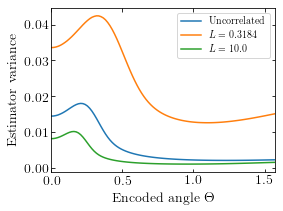

In [234]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

lbl = get_corr_param_dict_lbl(max_corr=0.0, corr_length=1.0) # Uncorrelated case
variances = GP_ests_1[lbl][2]
plt.plot(THETAS, variances, label='Uncorrelated')

corr_length = 0.3184
lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
variances = GP_ests_non_circ[lbl][2]
plt.plot(THETAS, variances, label='$L = {0}$'.format(corr_length))

corr_length = 10.0
lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
variances = GP_ests_non_circ[lbl][2]
plt.plot(THETAS, variances, label='$L = {0}$'.format(corr_length))

plt.legend()
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Estimator variance')
plt.xlim(xmin=THETAS[0], xmax=THETAS[-1])
plt.tick_params(direction='in', top='on', right='on')

plt.show()
# plt.savefig('plots/var_theta.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Fig 4a - Decoding distribution at theta=0 for Uncorrelated

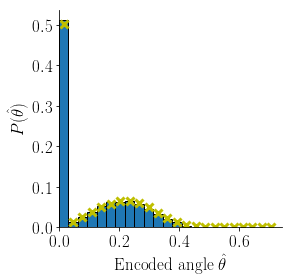

In [203]:
plt.figure(figsize=(4,4))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('axes', labelsize=17)

upper_cand_est_idx = 23
diff_cand_est = (CAND_ESTS[1] - CAND_ESTS[0]) / 2

lbl = get_corr_param_dict_lbl(max_corr=0.0, corr_length=0.5)
est_dist = ML_ests_1[lbl][0][0,:]
weights = np.ones_like(est_dist)/float(len(est_dist))
plt.hist(est_dist, weights=weights, bins=CAND_ESTS[:upper_cand_est_idx], edgecolor='black')

lbl = get_corr_param_dict_lbl(max_corr=0.0, corr_length=1.0)
prob_dist = GP_ests_1[lbl][0][0,:upper_cand_est_idx]
plt.plot(CAND_ESTS[:upper_cand_est_idx] + diff_cand_est, prob_dist, 'x', mew=3, ms=8, color='y')

plt.xlim(xmin=CAND_ESTS[0])
plt.xlabel(r'Encoded angle $\hat{\theta}$')
plt.ylabel(r'$P(\hat{\theta})$')

seaborn.despine()

plt.show()
# plt.savefig('plots/est_dist_uncorr.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Fig 4b - Decoding distribution at theta=0 for L=0.32

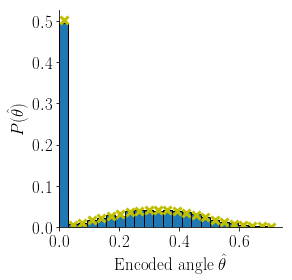

In [205]:
plt.figure(figsize=(4,4))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('axes', labelsize=17)

upper_cand_est_idx = 23
diff_cand_est = (CAND_ESTS[1] - CAND_ESTS[0]) / 2
corr_length = 0.3184

lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
est_dist = ML_ests_non_circ[lbl][0][0,:]
weights = np.ones_like(est_dist)/float(len(est_dist))
plt.hist(est_dist, weights=weights, bins=CAND_ESTS[:upper_cand_est_idx], edgecolor='black')

lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
prob_dist = GP_ests_non_circ[lbl][0][0,:upper_cand_est_idx]
plt.plot(CAND_ESTS[:upper_cand_est_idx] + diff_cand_est, prob_dist, 'x', mew=3, ms=8, color='y')

plt.xlim(xmin=CAND_ESTS[0])
plt.xlabel(r'Encoded angle $\hat{\theta}$')
plt.ylabel(r'$P(\hat{\theta})$')

seaborn.despine()

plt.show()
# plt.savefig('plots/est_dist_l032.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Fig 4b - Decoding distribution at theta=0 for L=10

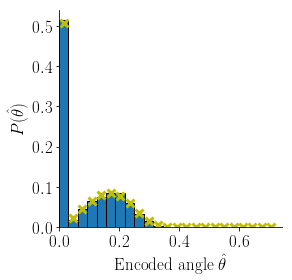

In [207]:
plt.figure(figsize=(4,4))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('axes', labelsize=17)

upper_cand_est_idx = 23
diff_cand_est = (CAND_ESTS[1] - CAND_ESTS[0]) / 2
corr_length = 10.0

lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
est_dist = ML_ests_non_circ[lbl][0][0,:]
weights = np.ones_like(est_dist)/float(len(est_dist))
plt.hist(est_dist, weights=weights, bins=CAND_ESTS[:upper_cand_est_idx], edgecolor='black')

lbl = get_corr_param_dict_lbl(max_corr=1.0, corr_length=corr_length)
prob_dist = GP_ests_non_circ[lbl][0][0,:upper_cand_est_idx]
plt.plot(CAND_ESTS[:upper_cand_est_idx] + diff_cand_est, prob_dist, 'x', mew=3, ms=8, color='y')

plt.xlim(xmin=CAND_ESTS[0])
plt.xlabel(r'Encoded angle $\hat{\theta}$')
plt.ylabel(r'$P(\hat{\theta})$')

seaborn.despine()

plt.show()
# plt.savefig('plots/est_dist_l10.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Fig 5 - Bias vs neurons

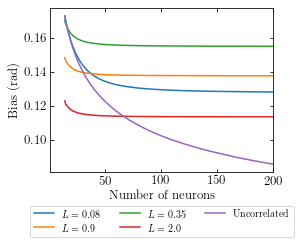

In [240]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)

n_neurons_upper = 501
n_neurons_arr = np.arange(1, n_neurons_upper)

skip_idx = 13
end_idx = 200

plt.plot(n_neurons_arr[skip_idx:end_idx], biases_neurons_corr_GP_1[skip_idx:end_idx], label='$L = 0.08$')
plt.plot(n_neurons_arr[skip_idx:end_idx], biases_neurons_corr_GP_2_l09[skip_idx:end_idx], label='$L = 0.9$')
plt.plot(n_neurons_arr[skip_idx:end_idx], biases_neurons_corr_GP[skip_idx:end_idx], label='$L = 0.35$')
plt.plot(n_neurons_arr[skip_idx:end_idx], biases_neurons_corr_GP_2_l2[skip_idx:end_idx], label='$L = 2.0$')
plt.plot(n_neurons_arr[skip_idx:end_idx], biases_neurons_ind_GP[skip_idx:end_idx], label='Uncorrelated')

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=3)

plt.xlabel('Number of neurons')
plt.ylabel('Bias (rad)')
plt.xlim(xmin=1, xmax=n_neurons_arr[end_idx-1])
plt.tick_params(direction='in', top='on', right='on')

plt.show()
# plt.savefig('plots/bias_neurons.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Fig 6 - Population response 

In [301]:
stim = 0.0

max_corr = 1.0
corr_length = 0.3184
mean_pop_res = tuning_curve_theta(PREF_STIMS, stim)
cov_mtx = construct_cov_matrix(max_corr, corr_length)
pop_res = np.random.multivariate_normal(mean_pop_res, cov_mtx)

In [308]:
pop_res_2 = np.random.multivariate_normal(mean_pop_res, cov_mtx)

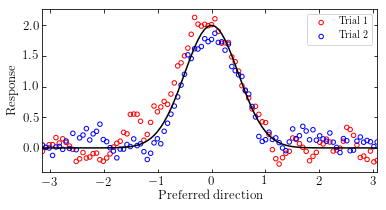

In [397]:
plt.figure(figsize=(6,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)

plt.scatter(PREF_STIMS, pop_res, facecolors='none', edgecolors='r', s=20, label='Trial 1')
plt.scatter(PREF_STIMS, pop_res_2, facecolors='none', edgecolors='b', s=20, label='Trial 2')
plt.plot(PREF_STIMS, mean_pop_res, color='k', ls='solid')

plt.xlabel('Preferred direction')
plt.ylabel('Response')
plt.xlim(xmin=PREF_STIMS[0], xmax=PREF_STIMS[-1])
plt.tick_params(direction='in', top='on', right='on')
plt.legend()

plt.show()
# plt.savefig('plots/pop_res.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Fig 7 - Correlation matrix

In [361]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

In [345]:
max_corr = 1.0
corr_length = 0.8
corr_mtx = construct_corr_matrix(max_corr, corr_length)

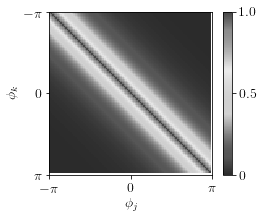

In [411]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

data_coords = [PREF_STIMS[0], PREF_STIMS[-1], PREF_STIMS[-1], PREF_STIMS[0]]
plt.imshow(corr_mtx, cmap=grayify_cmap('jet'), extent=data_coords)
cbar = plt.colorbar(ticks=[0.001, 0.5, 1.0])
cbar.ax.set_yticklabels(['$0$', '$0.5$', '$1.0$'])

plt.xlabel(r'$\phi_j$')
plt.ylabel(r'$\phi_k$')

plt.xticks([-pi, 0, pi], [r'$-\pi$', '$0$', r'$\pi$'])
plt.yticks([-pi, 0, pi], [r'$-\pi$', '$0$', r'$\pi$'])

plt.show()
# plt.savefig('plots/corr_matrix.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Cross-section correlation matrix

In [388]:
max_corr = 1.0
corr_length = 0.8
corr_mtx = construct_corr_matrix(max_corr, corr_length)

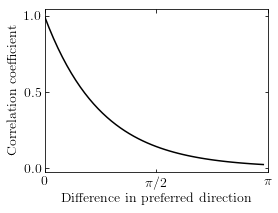

In [413]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

plt.plot(PREF_STIMS[50:], corr_mtx[50,50:], color='k', ls='solid')

plt.ylabel('Correlation coefficient')
plt.xlabel('Difference in preferred direction')

plt.tick_params(direction='in', top='on', right='on')
plt.xlim(xmin=0, xmax=PREF_STIMS[-1])

plt.yticks([0, 0.5, 1.0])
plt.xticks([0, pi/2, pi], [r'$0$', '$\pi/2$', r'$\pi$'])

plt.show()
# plt.savefig('plots/corr_matrix_cross_section.pdf', format='pdf', bbox_inches='tight')

plt.close()